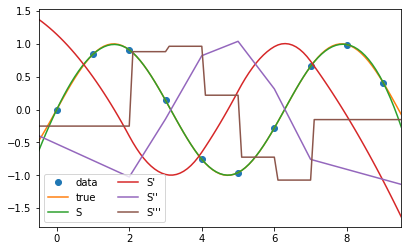

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'") #(,1) 옵션으로 미분값 가능
ax.plot(xs, cs(xs, 2), label="S''")
ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

ds/dx=0.0 ds/dy=1.0


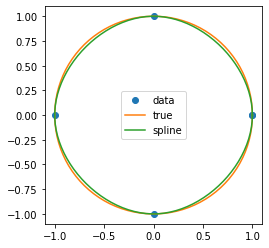

In [ ]:
theta = 2 * np.pi * np.linspace(0, 1, 5)
y = np.c_[np.cos(theta), np.sin(theta)]
cs = CubicSpline(theta, y, bc_type='periodic') #bc_type :경계조건
print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))

xs = 2 * np.pi * np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(y[:, 0], y[:, 1], 'o', label='data')
ax.plot(np.cos(xs), np.sin(xs), label='true')
ax.plot(cs(xs)[:, 0], cs(xs)[:, 1], label='spline')
ax.axes.set_aspect('equal')
ax.legend(loc='center')
plt.show()

In [ ]:
cs = CubicSpline([0, 1], [0, 1], bc_type=((1, 0), (1, 3)))
x = np.linspace(0, 1)
np.allclose(x**3, cs(x))

True

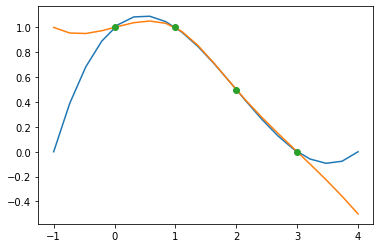

In [ ]:
x=[0.,1,2,3]
y=[1,1,0.5,0]
cs = CubicSpline(x,y)
csn = CubicSpline(x,y,bc_type=((2,0),(2,0))) #(미분차수,값)
xx = np.linspace(-1, 4,20)
plt.plot(xx,cs(xx))
plt.plot(xx,csn(xx))
plt.plot(x,y,'o')

## two equations

$$ x+(x-y)^3/2-1=0$$
$$ (y-x)^3/2+y=0$$

In [ ]:
## two equations

In [ ]:
def fun(x):
    return [x[0]  + 0.5 * (x[0] - x[1])**3 - 1.0,
            0.5 * (x[1] - x[0])**3 + x[1]]

def jac(x):
    return np.array([[1 + 1.5 * (x[0] - x[1])**2,
                      -1.5 * (x[0] - x[1])**2],
                     [-1.5 * (x[1] - x[0])**2,
                      1 + 1.5 * (x[1] - x[0])**2]])

In [ ]:
from scipy import optimize
sol = optimize.root(fun, [0, 0], jac=jac, method='hybr')
sol.x

array([0.8411639, 0.1588361])

In [ ]:
sol

    fjac: array([[ 0.89914291, -0.43765515],
       [ 0.43765515,  0.89914291]])
     fun: array([-1.11022302e-16,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 10
    njev: 1
     qtf: array([-1.19565972e-11,  4.12770392e-12])
       r: array([ 2.16690469, -1.03701789,  1.10605417])
  status: 1
 success: True
       x: array([0.8411639, 0.1588361])

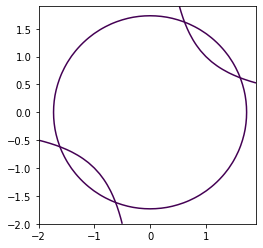

In [ ]:
#x^2+y^2-3=0
#x*y-1=0

#f(x,y)
lim=2.0
delta=0.1
xdata=np.arange(-lim,lim,delta)
ydata=xdata.copy()
x,y=np.meshgrid(xdata,ydata)
def f1(x,y):
  return x**2+y**2-3

def f2(x,y):
  return x*y-1

F1=f1(x,y)
F2=f2(x,y)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
plt.contour(x,y,F1,[0])
plt.contour(x,y,F2,[0])

In [ ]:
from scipy.optimize import root
def func(x):
  return [f1(*x),f2(*x)]

x0=[1,0]
sol=root(func,x0)
sol.x

array([1.61803399, 0.61803399])

In [ ]:
func(sol.x)

[0.0, 2.220446049250313e-16]

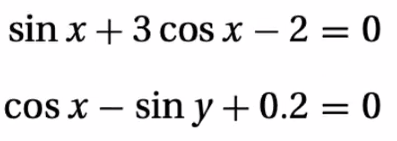

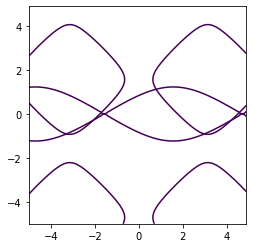

In [ ]:
lim=5.0
delta=0.1
xdata=np.arange(-lim,lim,delta)
ydata=xdata.copy()
x,y=np.meshgrid(xdata,ydata)
def f1(x,y):
  return np.sin(x)+3*np.cos(y)-2

def f2(x,y):
  return np.cos(x)-np.sin(y) +0.2

F1=f1(x,y)
F2=f2(x,y)
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
plt.contour(x,y,F1,[0])
plt.contour(x,y,F2,[0])

In [ ]:
def func(x):
  return [f1(*x),f2(*x)]

x0=[1,1]
sol=root(func,x0)
sol.x

array([0.7911678 , 1.12673723])

In [ ]:
func(sol.x)

[-2.6645352591003757e-15, -3.7192471324942744e-15]

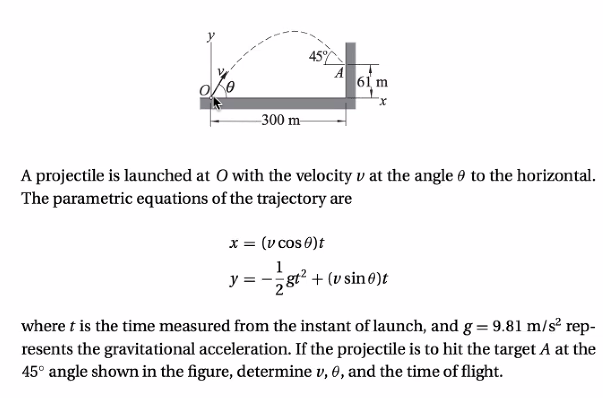